In [13]:
import numpy as np
import pandas as pd
import math
import numpy.random as rand
import scipy
from scipy.stats import binom as binomial
from scipy.stats import beta as betafunction
from scipy.stats import norm
from scipy.stats import gamma
import matplotlib.pyplot as plt
from IPython.display import display
import sys
import pickle
%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True) #Want to be able to use tex in the plot labels

import seaborn
seaborn.set_style('ticks')
seaborn.set_color_codes()


In [14]:
#Load in chains run using all three datasets from fake data:
samples = []
i = 0
burnin = 1000
for line in open('chains/fakedata/veff0.5/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples50 = np.array(samples)
samples50 = samples50.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/veff0.6/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples60 = np.array(samples)
samples60 = samples60.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/veff0.7/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples70 = np.array(samples)
samples70 = samples70.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/veff0.8/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples80 = np.array(samples)
samples80 = samples80.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/veff0.9/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples90 = np.array(samples)
samples90 = samples90.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/veff1.0/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples100 = np.array(samples)
samples100 = samples100.astype(float)

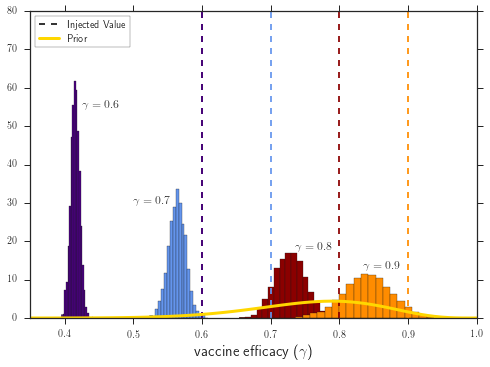

In [85]:
#Look at v_eff:

x = np.linspace(0,1,100)
y = scipy.stats.beta.pdf(x,a=16.,b=5.)
#veff50,b,c = plt.hist(samples50[:,6],bins=20, normed=True)
veff60,b,c = plt.hist(samples60[:,6],bins=20, normed=True, color ='indigo')
plt.axvline(0.6,c='k',ls='--',label='Injected Value')
plt.axvline(0.6,c='indigo',ls='--')
veff70,b,c = plt.hist(samples70[:,6],bins=20, normed=True, color = 'cornflowerblue')
plt.axvline(0.7,c='cornflowerblue',ls='--')
veff80,b,c = plt.hist(samples80[:,6],bins=20, normed=True, color = 'darkred')
plt.axvline(0.8,c='darkred',ls='--')
veff90,b,c = plt.hist(samples90[:,6],bins=20, normed=True, color = 'darkorange')
plt.axvline(0.9,c='darkorange',ls='--')
#veff100,b,c = plt.hist(samples100[:,6],bins=20, normed=True, color ='darkdarkgreen')
plt.plot(x,y,color='gold',lw=3, label='Prior')
plt.legend(loc='upper left',frameon=True)
plt.annotate('$\gamma = 0.6$',(0.425,55),fontsize=12)
plt.annotate('$\gamma = 0.7$',(0.5,30),fontsize=12)
plt.annotate('$\gamma = 0.8$',(0.735,18),fontsize=12)
plt.annotate('$\gamma = 0.9$',(0.835,13),fontsize=12)
plt.xlim(0.35,1)
plt.ylim(0,80)
plt.xlabel('vaccine efficacy ($\gamma$)',fontsize=15)
plt.savefig('veff_fakedata_vaxserocase.pdf')

In [ ]:
#Look at vh and foi: